In [88]:
from pymongo import MongoClient
from sklearn.gaussian_process import GaussianProcessRegressor

class SmoothFunctionCreator():
    def __init__(self, seed=42):
        self._gp = GaussianProcessRegressor()
        x_train = np.array([0.0, 2.0, 6.0, 10.0])[:, np.newaxis]
        source_train = np.array([0.0, 1.0, -1.0, 0.0])
        self._gp.fit(x_train, source_train)
        self._random_state = np.random.RandomState(seed)

    def sample(self, n_samples):
        x = np.linspace(0.0, 10.0, 100)[:, np.newaxis]
        source = self._gp.sample_y(x, n_samples, random_state=self._random_state)
        target = gaussian_filter1d(source, 1, order=1, axis=0)
        target = np.tanh(10.0 * target)
        return source, target

In [89]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.ndimage.filters import gaussian_filter1d

gp = GaussianProcessRegressor()
x_train = np.array([0.0, 2.0, 6.0, 10.0])[:, np.newaxis]
source_train = np.array([0.0, 1.0, -1.0, 0.0])
gp.fit(x_train, source_train)
x = np.linspace(0.0, 10.0, 100)[:, np.newaxis]
source = gp.sample_y(x, n_samples=100).T
target = gaussian_filter1d(source, 1, order=1, axis=1)
target = np.tanh(10.0 * target)

C:\Users\Artur\Development\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


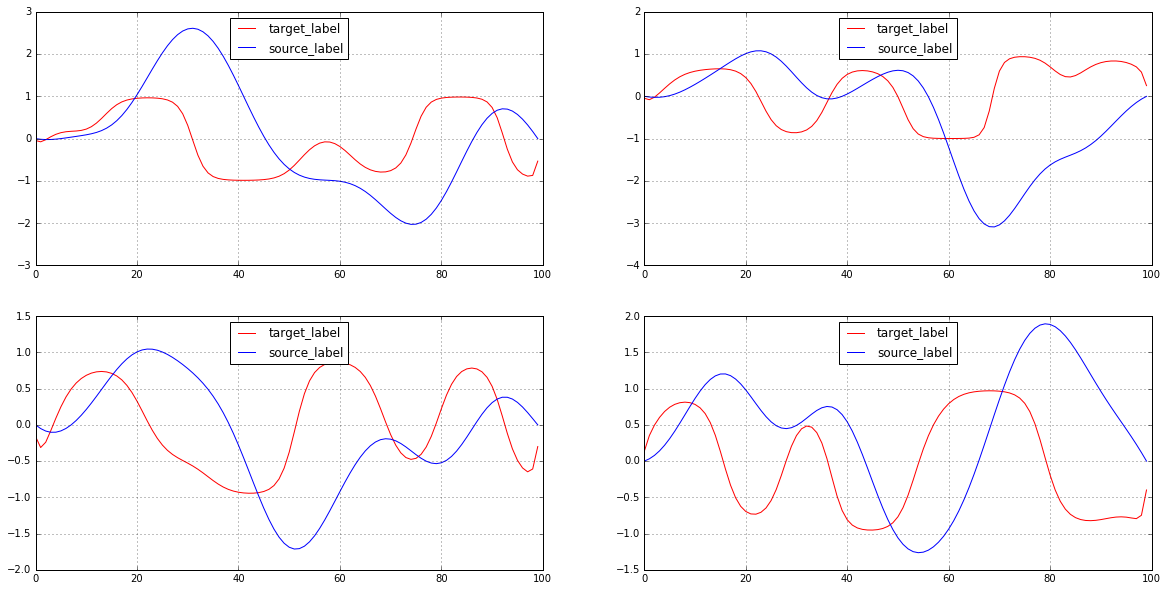

In [90]:
import matplotlib.pylab as plt
%matplotlib inline

def plot_figures(source, target, source_label, target_label):
    fig = plt.figure(figsize=(20, 10))

    for index in range(4):
        ax = fig.add_subplot(2,2,index + 1)
        ax.plot(target[index, :], color='red', label=target_label)
        ax.plot(source[index, :], color='blue', label=source_label)
        ax.legend(loc='upper center')
        ax.grid(True)

plot_figures(source, target, 'source_label', 'target_label')

In [91]:
from sklearn.model_selection import train_test_split

source_train, source_test, target_train, target_test = train_test_split(source, target, test_size=0.2)

In [92]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(source_train, target_train)
target_train_predicted = regressor.predict(source_train)
target_test_predicted = regressor.predict(source_test)

rms: 0.06333107680720144


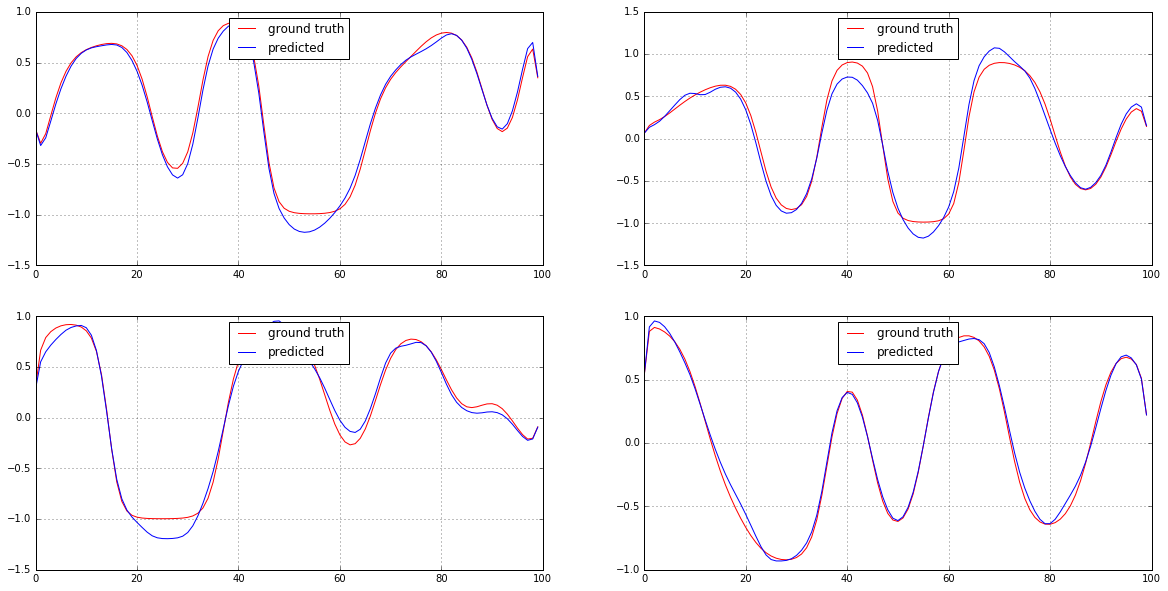

In [93]:
from numpy.linalg import norm

rms = norm(target_train_predicted - target_train) / np.sqrt(np.size(target_train))
print('rms: {}'.format(rms))
plot_figures(target_train_predicted, target_train, 'predicted', 'ground truth')

rms: 0.34995658562661475


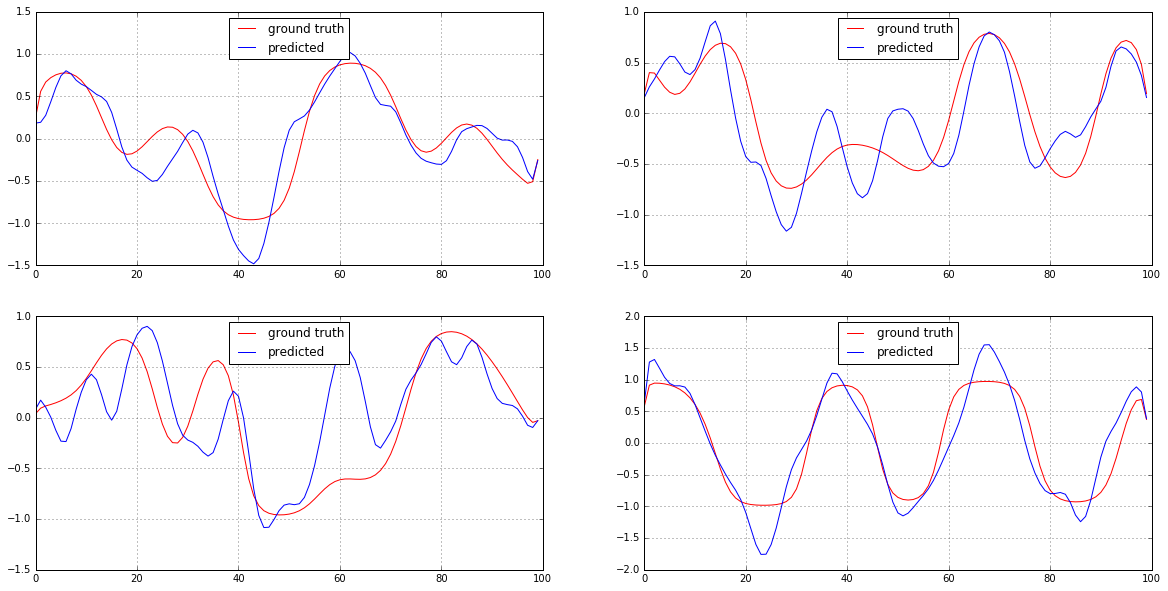

In [94]:
rms = norm(target_test_predicted - target_test) / np.sqrt(np.size(target_test))
print('rms: {}'.format(rms))
plot_figures(target_test_predicted, target_test, 'predicted', 'ground truth')

In [95]:
from sklearn.decomposition import PCA

source_dr_model = PCA(15)
source_dr_model.fit(source_train)

target_dr_model = PCA(10)
target_dr_model.fit(target_train);

In [96]:
source_dr_train = source_dr_model.transform(source_train)
source_dr_test = source_dr_model.transform(source_test)
target_dr_train = target_dr_model.transform(target_train)

regressor_dr = LinearRegression()
regressor_dr.fit(source_dr_train, target_dr_train)
target_dr_predicted = regressor_dr.predict(source_dr_test)
target_predicted = target_dr_model.inverse_transform(target_dr_predicted)

rms: 0.1602737135941924


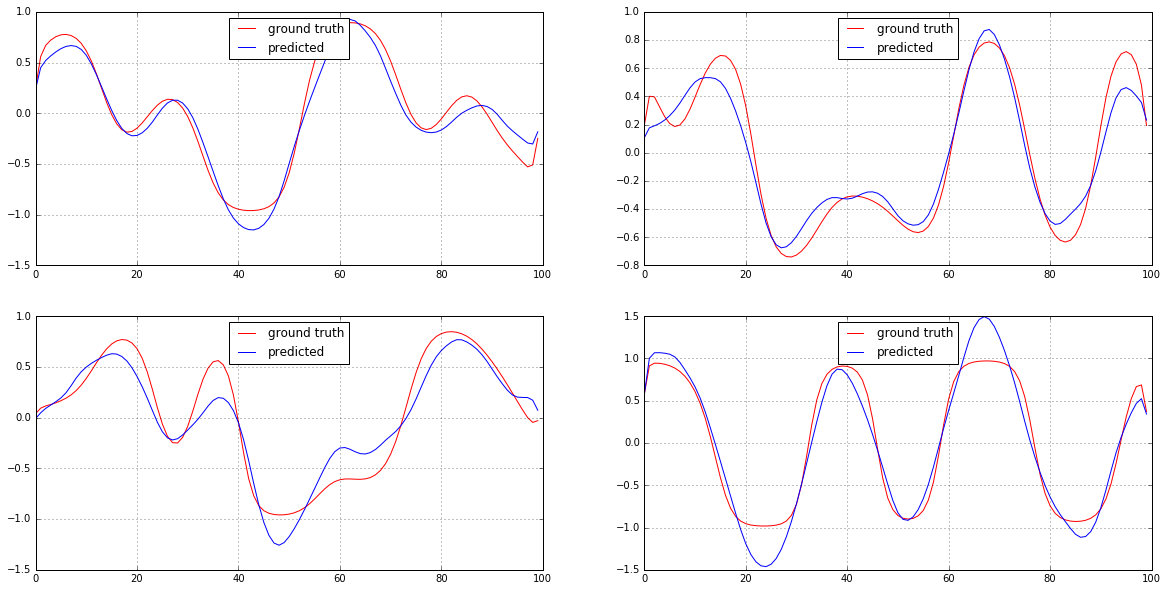

In [98]:
rms = norm(target_predicted - target_test) / np.sqrt(np.size(target_test))
print('rms: {}'.format(rms))
plot_figures(target_predicted, target_test, 'predicted', 'ground truth')